# Cours PCD – Labo 4 : ACP sur des images

## Tâches et questions



In [1]:
%matplotlib inline

## Question 1

c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


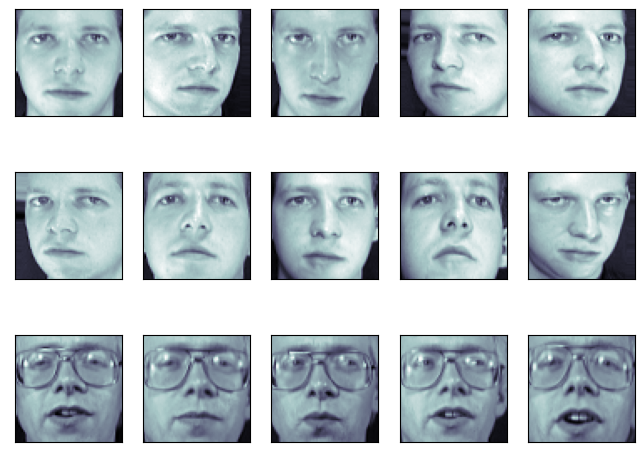

In [2]:
from sklearn import datasets
from matplotlib import pyplot as plt

faces = datasets.fetch_olivetti_faces()
faces.data.shape

fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

### a)
```datasets.fetch_olivetti_faces()``` retourne le dataset "Olivetti Faces". Ce dataset est un ensemble d'images de visages de personnes.

`faces.data` est un tableau de 400 images représentées chacune par un tableau de 64 * 64 pixels. Les images sont en noir et blanc donc les pixels sont représentés par un seule valeur numérique entre 0 et 1.

### b)
Il y a 40 personnes différentes (donc 40 "classes") et 10 images pour chaque personne.

### c)
Comme dit au point *a)*, chaque image est composée de 64*64 (4096) pixels représentés chacun par un nombre à virgule entre 0 et 1.

### d)

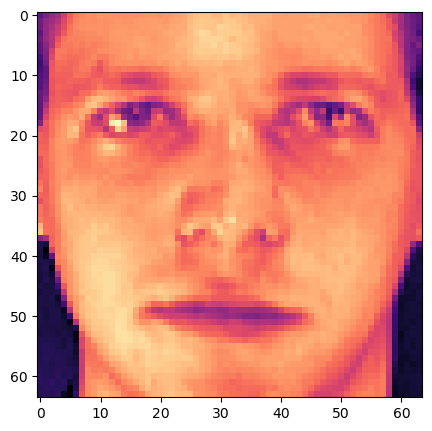

In [3]:
# Point 1.d)
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
img = fig.add_subplot(1,1,1)
img.imshow(faces.images[0], cmap='magma')

## Question 2

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(faces.data,
        faces.target, random_state=0,stratify=faces.target, train_size=0.8)

# On a bien 80% du dataset en train et le reste en test
print(x_train.shape, x_validation.shape)

# On a bien 80% des 10 éléments (donc 8) pour chaque classe (visage)
print(np.unique(np.sort(y_train), return_counts=True))

(320, 4096) (80, 4096)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


## Question 3

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# expérience de classification avec KNN
def knn_train(train_data, train_expected):
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(train_data, train_expected)
    return knn_clf

# expérience de classification avec une régression logistique
def log_regr_train(train_data, train_expected):
    lr_clf = LogisticRegression()
    lr_clf.fit(train_data, train_expected)
    return lr_clf

# expérience de classification avec SVM
def svm_train(train_data, train_expected):
    svm_clf = svm.SVC()
    svm_clf.fit(train_data, train_expected)
    return svm_clf

In [6]:

def run_train_experiment(train_data, train_expected, test_data, test_expected, show_confusion_matrices=False):
    knn_pred = knn_train(train_data, train_expected).predict(test_data)
    lr_pred = log_regr_train(train_data, train_expected).predict(test_data)
    svm_pred = svm_train(train_data, train_expected).predict(test_data)

    # accuracy de chacun des modèles (knn, logistique, svm)

    if show_confusion_matrices:
        print("KNN accuracy :", accuracy_score(test_expected, knn_pred))
        print("Logistical Regression accuracy :", accuracy_score(test_expected, lr_pred))
        print("SVM accuracy :", accuracy_score(test_expected, svm_pred))

    if show_confusion_matrices:
        fig, axes = plt.subplots(1, 3, figsize=(30, 10))
        ConfusionMatrixDisplay.from_predictions(test_expected, knn_pred, ax=axes[0])  
        ConfusionMatrixDisplay.from_predictions(test_expected, lr_pred, ax=axes[1])
        ConfusionMatrixDisplay.from_predictions(test_expected, svm_pred, ax=axes[2])

    return knn_pred, lr_pred, svm_pred



c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN accuracy : 0.875
Logistical Regression accuracy : 0.9375
SVM accuracy : 0.95


(array([ 7, 10, 11,  0,  8,  0, 23, 11, 27, 20,  0,  2, 22,  8, 31, 32,  0,
        29, 33,  6, 22, 18,  5, 26, 39, 20, 21,  4, 30, 28, 22, 17, 13, 17,
        19, 39,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 17,  4, 36, 15, 38,
         9, 12, 25, 12, 17, 35, 31, 29, 16, 19, 18, 16, 20,  6,  5,  1,  4,
        33, 24, 26, 13, 14, 21, 10, 32, 37,  1, 14, 24]),
 array([ 7, 10, 11, 39,  8, 15, 23, 11, 27, 20,  2,  2,  3,  8, 31, 32,  0,
        29, 33,  6,  2, 18,  5, 26, 39, 28, 21, 34, 30, 28, 22, 17, 13,  3,
        19, 37,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 22,  5, 36, 15, 38,
         9, 12,  2, 12, 17, 35, 31, 29, 16, 19, 18, 16, 20,  6,  5,  1,  4,
        33, 24, 26, 13, 14, 38, 10, 32, 37,  1, 14, 24]),
 array([ 7, 10, 11, 39,  8, 15, 23, 11, 27, 20,  0,  2,  3,  8, 31, 32,  0,
        29, 33,  6,  2, 18,  5, 26, 39, 28, 21, 34, 30, 28, 22, 17, 13,  3,
        19, 37,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 22, 39, 36, 15, 38,
         9, 12,  2, 12, 17, 35, 31, 29, 16, 19, 

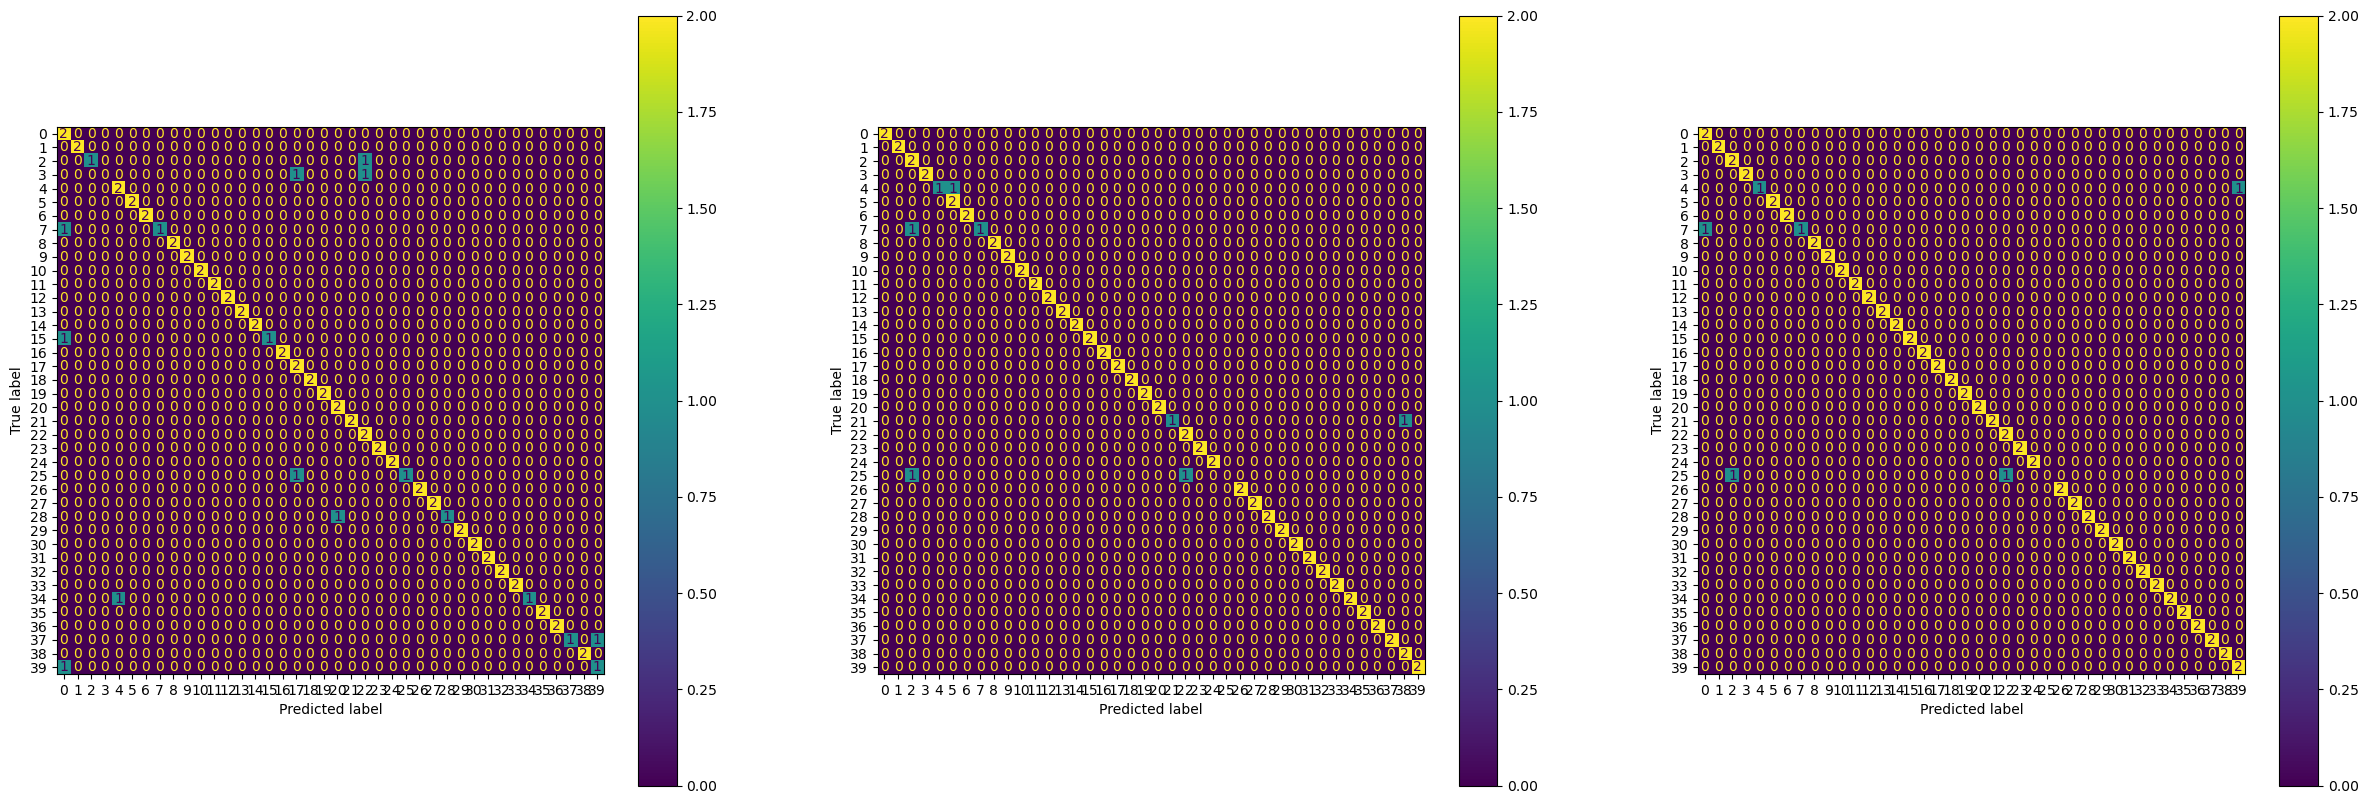

In [7]:
run_train_experiment(x_train, y_train, x_validation, y_validation, show_confusion_matrices=True)

KNN accuracy : 0.5875
Logistical Regression accuracy : 0.9375
SVM accuracy : 0.925


(array([ 7, 10, 11, 39,  8, 14, 23, 11, 27, 14,  0,  4, 14,  8, 14, 32, 39,
        29, 33,  4, 14, 29,  5, 26, 39, 14, 21,  4,  5, 28, 14, 17, 13, 14,
        19, 29,  0,  9, 14, 23, 22, 34, 29, 30, 29, 24, 22,  4, 14, 14, 38,
         9, 12, 25, 12, 17, 17, 14, 29, 29, 14, 18,  3, 20, 17,  5, 14,  4,
        33, 24, 29, 13, 14,  4, 10, 32, 37,  8, 14, 24]),
 array([ 7, 10, 11, 39,  8, 15, 23, 11, 27, 20,  2,  2,  3,  8, 31, 32, 39,
        29, 33,  6,  2, 18,  5, 26, 39, 28, 21, 34, 30, 28, 22, 17, 13,  3,
        19, 37,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 25, 39, 36, 15, 38,
         9, 12,  2, 12, 17, 35, 31, 29, 16, 19, 18, 16, 20,  6,  5,  1,  4,
        33, 24, 26, 13, 14, 38, 10, 32, 37,  1, 14, 24]),
 array([ 7, 10, 11, 39,  8, 15, 23, 11, 27, 20,  3,  2, 20,  8, 31, 32,  0,
        29, 33,  6,  2, 18,  5, 26, 39, 28, 21, 34, 30, 28, 22, 17, 13,  3,
        19, 37,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 25, 39, 36, 15, 38,
         9, 12,  2, 12, 17, 35, 31, 29, 16, 19, 

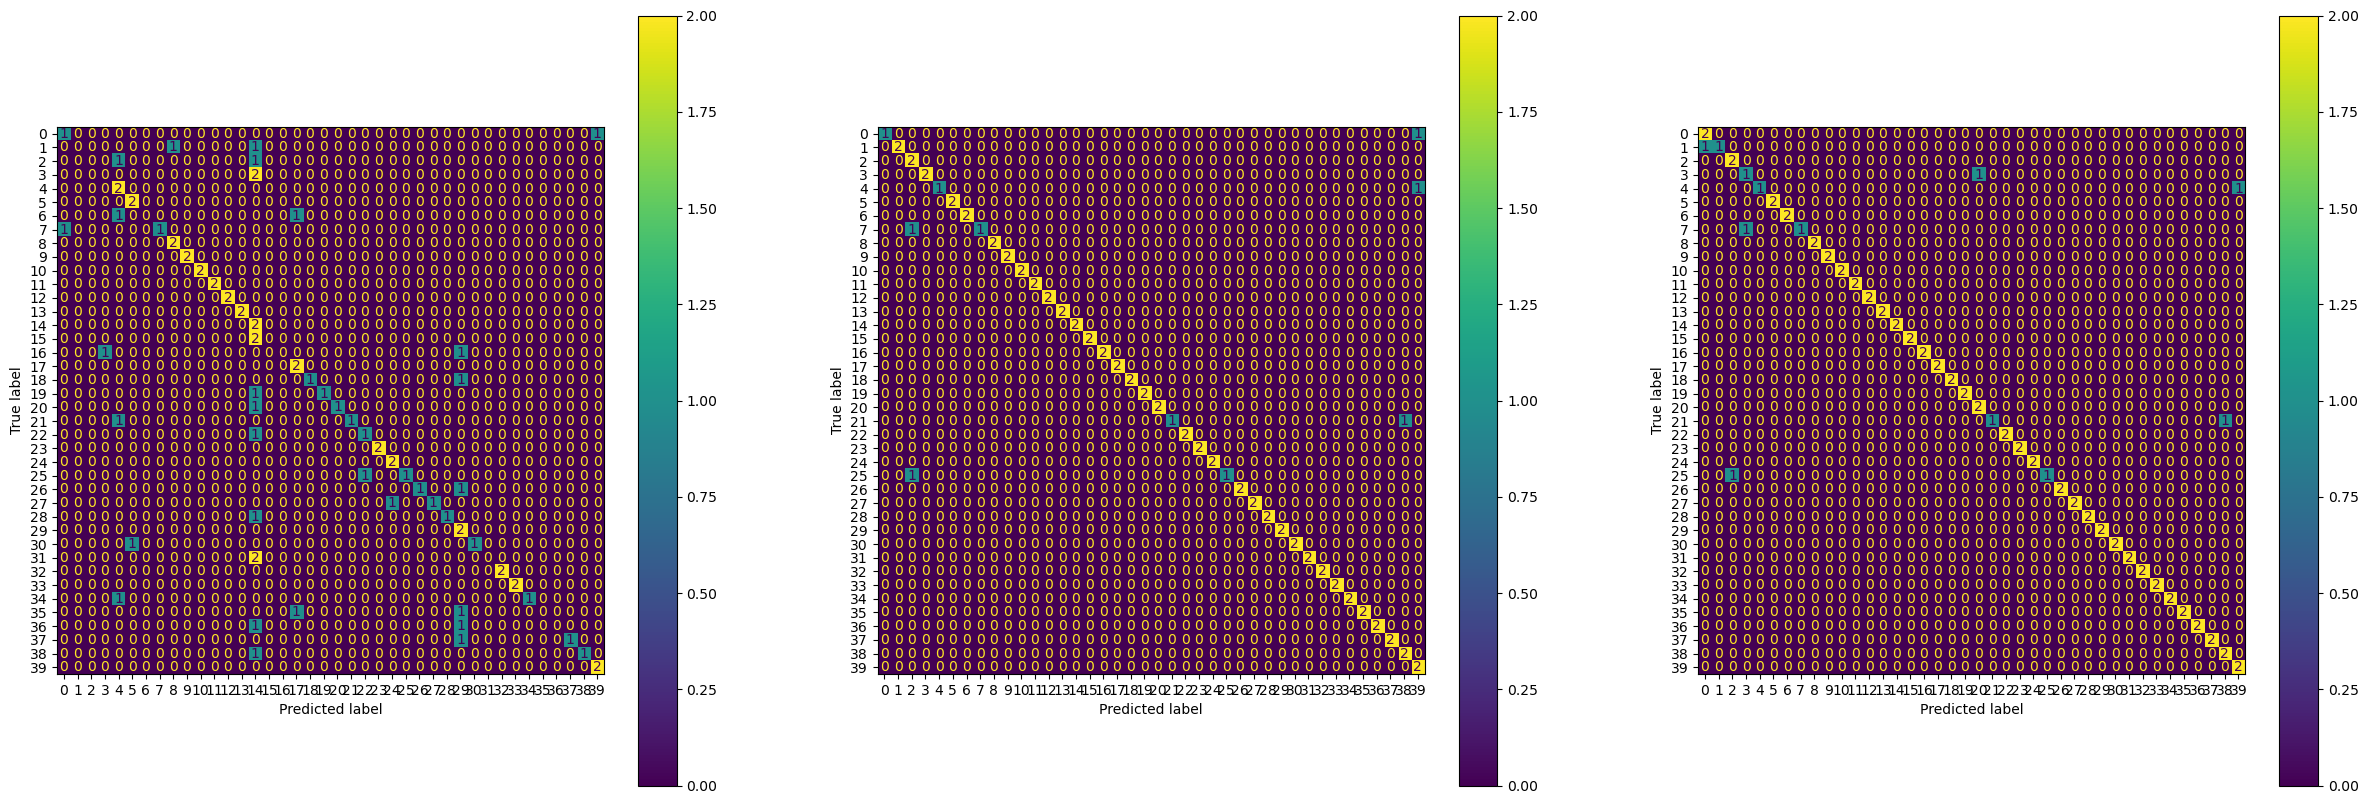

In [8]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(x_train)
X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_validation)

run_train_experiment(X_train_pca, y_train, X_test_pca, y_validation, show_confusion_matrices=True)

On obtient de moins bons résultats que sans utiliser de composantes !

In [9]:
from sklearn import decomposition
import pandas as pnd

results = pnd.DataFrame(columns=["Components", "KNN accuracy", "Log Reg accuracy", "SVM accuracy"])

for components_count in range(10, 300, 2):
    components = decomposition.PCA(n_components=components_count, whiten=True)
    components.fit(x_train)
    transformed_x_train = components.transform(x_train)
    transformed_x_test = components.transform(x_validation)

    #print("### Results for",components_count," components : ")
    knn_pred, lr_pred, svm_pred = run_train_experiment(transformed_x_train, y_train, transformed_x_test, y_validation)

    knn_accuracy = accuracy_score(y_validation, knn_pred)
    lr_accuracy = accuracy_score(y_validation, lr_pred)
    svm_accuracy = accuracy_score(y_validation, svm_pred)

    results.loc[len(results)] = [components_count, knn_accuracy, lr_accuracy, svm_accuracy]

In [ ]:
print(results.sort_values("KNN accuracy", ascending=False).head())
print(results.sort_values("Log Reg accuracy", ascending=False).head())
print(results.sort_values("SVM accuracy", ascending=False).head())

    Components  KNN accuracy  Log Reg accuracy  SVM accuracy
9         28.0        0.8875              0.95        0.9375
11        32.0        0.8875              0.95        0.9375
5         20.0        0.8875              0.95        0.9375
8         26.0        0.8875              0.95        0.9375
7         24.0        0.8750              0.95        0.9375
    Components  KNN accuracy  Log Reg accuracy  SVM accuracy
19        48.0        0.8500            0.9750        0.9625
18        46.0        0.8625            0.9625        0.9750
17        44.0        0.8750            0.9625        0.9750
16        42.0        0.8250            0.9625        0.9625
20        50.0        0.8125            0.9625        0.9625
    Components  KNN accuracy  Log Reg accuracy  SVM accuracy
18        46.0        0.8625            0.9625        0.9750
17        44.0        0.8750            0.9625        0.9750
15        40.0        0.8500            0.9500        0.9625
24        58.0        0.

## 6.
Avec 48 composantes, on obtient une accuracy de 0.975 pour le modèle de regression logsitique et le modèle SVM.
Avec 26 composantes, on obtient une accuracy de 0.9 pour KNN (la meilleur pour ce modèle)

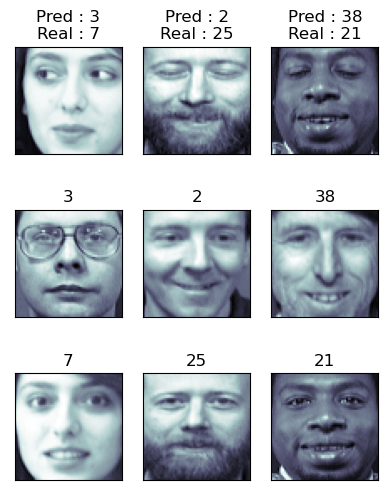

In [ ]:
import numpy as np

optimal_components = decomposition.PCA(n_components=48, whiten=True)
components.fit(x_train)
training_data = components.transform(x_train)
testing_data = components.transform(x_validation)
svm_model = svm_train(training_data, y_train)

predictions = svm_model.predict(testing_data)

wrong = y_validation != predictions

fig = plt.figure(figsize=(8,6))

for i, j in enumerate(np.where(wrong)[0]):
    if i == 5:
        break
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_validation[j].reshape(faces.images[0].shape), cmap=plt.cm.bone)

    wrong_prediction = svm_model.predict(testing_data[j, np.newaxis])[0]
    ax.set_title(f'Pred : {wrong_prediction}\nReal : {y_validation[j]}')

    expected_person_id = y_validation[j]

    ax = fig.add_subplot(3, 5, i + 6, xticks=[], yticks=[])
    ax.imshow(faces.images[wrong_prediction * 10], cmap="bone")
    ax.set_title(f'{wrong_prediction}')

    ax = fig.add_subplot(3, 5, i + 11, xticks=[], yticks=[])
    ax.imshow(faces.images[expected_person_id * 10], cmap="bone")
    ax.set_title(f'{expected_person_id}')


plt.show()

In [ ]:
from scipy import stats
import keras
from keras import layers
from sklearn.model_selection import KFold

# creations de folds pour la validation croisée
N_FOLDS = 5

keras.utils.set_random_seed(123)
kf = KFold(n_splits=N_FOLDS, shuffle=True)

# taille totale et taille des folds
folds = kf.split(x_train)

for fold in folds:
    train_indices = fold[0]
    test_indices = fold[1]

    training_data = x_train[train_indices]
    testing_data = y_train[test_indices]
    svm_model = svm_train(training_data, testing_data)

    optimal_components = decomposition.PCA(n_components=48, whiten=True)
    components.fit(x_train)
    pca_training_data = components.transform(training_data)
    pca_testing_data = components.transform(testing_data)
    svm_model_with_pca = svm_train(pca_training_data, pca_testing_data)

# todo : continueerr la prochaine fois :))))))))))))))))))
    


NameError: name 'x_train' is not defined

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

In [ ]:
print(metrics.confusion_matrix(y_validation, y_pred))

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_validation)
print(metrics.confusion_matrix(y_pred, y_validation))
plt.show()

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
